# Time Series Forecasting Demonstration (Stock Market Data)--LSTM  -- Data Preparation/Exploratory --  Multiple Input->Output- One Step-Ahead (Sequence to One)

**--------------------------------------------------------------------------------------------------------------------------**
**--------------------------------------------------------------------------------------------------------------------------**
**--------------------------------------------------------------------------------------------------------------------------**
**---------------------------------------------------**


**STRUCTURE**

*In this work, the use of the LSTM Deep Learning model for 'sequence to one' time series forecasting (stock market dataset) is demonstrated. **Part A** of this project is focused on data preparation/manipulation of the imported dataset features (open,close,high,low and volume stock market values of American Airlines Group Inc.) to apply all necessary data preprocessing/cleaning methods by use of numpy and pandas (i.e. creation of datetime object and use as index, feature engineering to extract datetime categories,mapping,etc.). Moreover, an exploratory analysis is provided in this section to highlight key aspects of the examined time series ('AAL Close Price') with respect to its past observations, so as to get meaningful insights in terms of its distribution,its correlations with the other dataset features and its behavior when grouped at different time periods.*

*In the second part of this work (**Part B**), the fitting and forecasting capabilities of the LSTM model are investigated. In particular, the LSTM model is trained to forecast the AAL Close Average Weekly price (prediction horizon of 52 Weeks) by creating a time series input sequence of 12 time steps and an output sequence consisting of the AAL Close Price at one-step ahead (X [index 0 to 11], y [index 12]).* 

*In terms of the forecasted outputs, a 'for loop' is created that takes each X test sequence, updates the time series batch and makes the prediction. For the evaluation of the LSTM model training and forecasting performance, plots of the fitted and predicted values against the actual(training and target) AAL Close Average Weekly prices are presented (Performance Metric --> Root Mean Squared Error). In addition, the relative training error (percentage) distribution plot is provided.*



**The Dataset (.csv file format) for this project has been obtained from Kaggle:**

"*S&P 500 stock data*" -- File: "all_stocks_5yr.csv" -- Source:https://www.kaggle.com/camnugent/sandp500



# Part A 

***Data Prepararation for Machine Learning - Exploratory Analysis*** 

In [1]:
# Importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing the S&P 500-Stock Market Dataset
dataset=pd.read_csv('all_stocks_5yr.csv',parse_dates=True)

In [3]:
# First 5 Entries
dataset.head()

,date,open,high,low,close,volume,Name
0,2013-02-08,15.07,15.12,14.63,14.75,8407500,AAL
1,2013-02-11,14.89,15.01,14.26,14.46,8882000,AAL
2,2013-02-12,14.45,14.51,14.10,14.27,8126000,AAL
3,2013-02-13,14.30,14.94,14.25,14.66,10259500,AAL
4,2013-02-14,14.94,14.96,13.16,13.99,31879900,AAL


In [4]:
# Dataset Information regarding a) the data type of each feature and b) total values per feature. Dataset comprises
# two 'object',four 'float' and one 'int' data type feature
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 619040 entries, 0 to 619039
Data columns (total 7 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   date    619040 non-null  object 
 1   open    619029 non-null  float64
 2   high    619032 non-null  float64
 3   low     619032 non-null  float64
 4   close   619040 non-null  float64
 5   volume  619040 non-null  int64  
 6   Name    619040 non-null  object 
dtypes: float64(4), int64(1), object(2)
memory usage: 33.1+ MB


In [5]:
# Creating a copy of the original dataset
data=dataset.copy()

In [6]:
# This demonstration is focused on the American Airlines Group Inc.(NASDAQ:'AAL') historical stock market data
data=data[data['Name']=='AAL']
data.head()

,date,open,high,low,close,volume,Name
0,2013-02-08,15.07,15.12,14.63,14.75,8407500,AAL
1,2013-02-11,14.89,15.01,14.26,14.46,8882000,AAL
2,2013-02-12,14.45,14.51,14.10,14.27,8126000,AAL
3,2013-02-13,14.30,14.94,14.25,14.66,10259500,AAL
4,2013-02-14,14.94,14.96,13.16,13.99,31879900,AAL


In [7]:
# 'Date' column is converted from 'object' data type to 'datetime' 
data['date'] = pd.to_datetime(data['date'])
# Feature Engineering is applied to extract the Days of Week,Months and Years from the 'Date' column
data['Week_Day'] = data['date'].apply(lambda date:date.dayofweek)
data['Month'] = data['date'].apply(lambda date:date.month)
data['Year'] = data['date'].apply(lambda date:date.year)
data.head(2)

,date,open,high,low,close,volume,Name,Week_Day,Month,Year
0,2013-02-08,15.07,15.12,14.63,14.75,8407500,AAL,4,2,2013
1,2013-02-11,14.89,15.01,14.26,14.46,8882000,AAL,0,2,2013


In [8]:
# Mapping to rename the entries of the 'Week_Day' column
data['Week_Day'] = data['Week_Day'].map({0:'Monday',1:'Tuesday',2:'Wednesday',3:'Thursday',4:'Friday'})
data.head(2)

,date,open,high,low,close,volume,Name,Week_Day,Month,Year
0,2013-02-08,15.07,15.12,14.63,14.75,8407500,AAL,Friday,2,2013
1,2013-02-11,14.89,15.01,14.26,14.46,8882000,AAL,Monday,2,2013


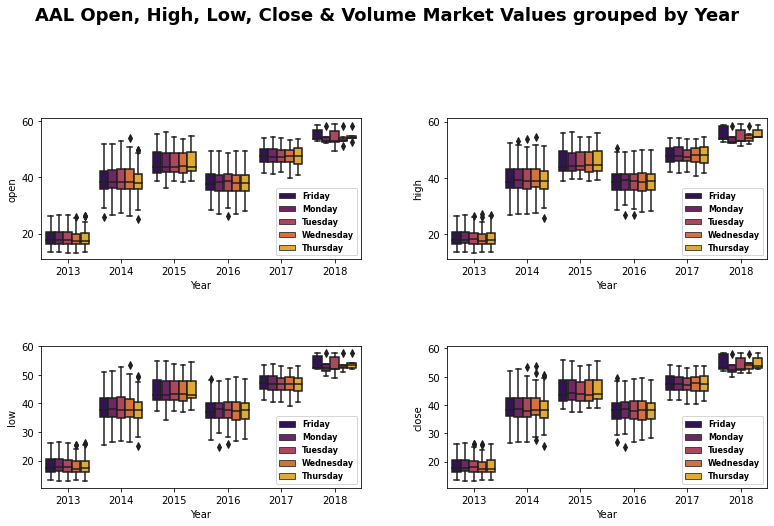

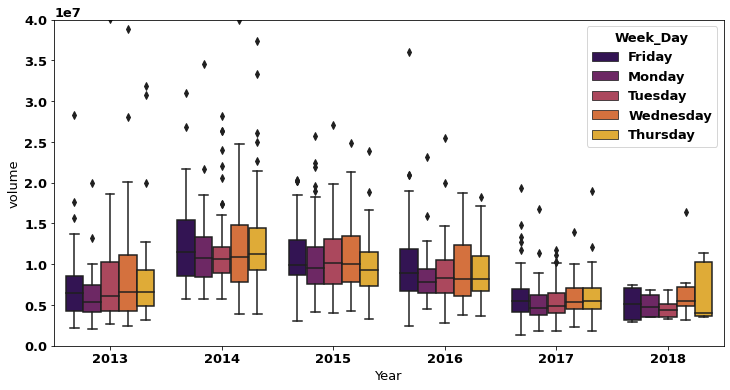

In [9]:
# Boxplots of AAL Open, High, Low, Close & Volume values grouped by Year. As expected, the stock market values of AAL open,
# High, Low and Close values are almost identical, due to the strong correlation between each other. With respect to the
# AAL Volume, the incease in the AAL volume from 2013 to 2014 was followed by a relative small value decrease over the
# next two years(2015 and 2016) and resulted in a significant value decrease in 2017 and 2018. Based on the last boxplot,
# the largest median value of AAL Volume is observed on Fridays, whereas for most years the smallest median AAL Volume
# value is observed on Mondays. 
# Note: the AAL stock market Volume boxplot presents all trading volume values <= 0.4E8 to increase the visibility of
# the plot by excluding values that are considered outliers (observations that lie a significantly large distance from 
# the other dataset values --- in this case, the very high trading volume values)
fig,axs=plt.subplots(2,2,figsize=(12,8))
plt.rcParams["font.weight"] = "bold"
plt.rcParams['font.size']=13
sns.boxplot(x='Year',data=data,y='open',hue='Week_Day',palette='inferno',ax=axs[0,0])

sns.boxplot(x='Year',data=data,y='high',hue='Week_Day',palette='inferno',ax=axs[0,1])

sns.boxplot(x='Year',data=data,y='low',hue='Week_Day',palette='inferno',ax=axs[1,0])

sns.boxplot(x='Year',data=data,y='close',hue='Week_Day',palette='inferno',ax=axs[1,1])

for ax in axs.flat:
    
    ax.legend(loc='best',fontsize=8)
    
    ax.set_xlabel('Year')
    ax.figure.tight_layout(pad=4)
    fig.suptitle("AAL Open, High, Low, Close & Volume Market Values grouped by Year", fontweight='bold',fontsize=18)

plt.figure(figsize=(12,6))
sns.boxplot(x='Year',y='volume',hue='Week_Day',palette='inferno',data=data)
plt.ylim(0,0.4E8);
    

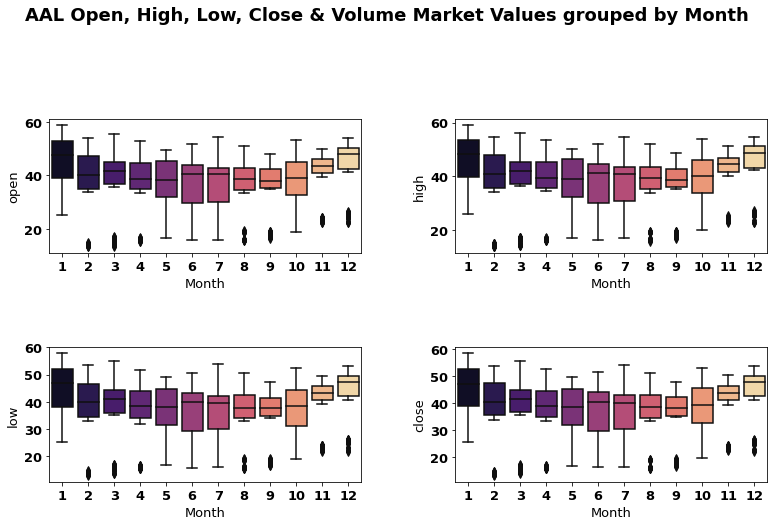

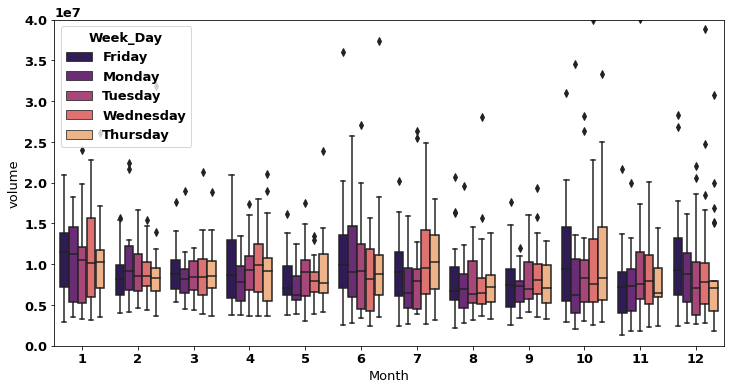

In [10]:
# Boxplots of AAL Open, High, Low, Close & Volume values grouped by Month. As before the stock market values of AAL open,
# High, Low and Close values are almost identical. Regarding the AAL market Volume values, January (Month 1) has been the
# month with the largest trading volume (boxplot median values) and August (Month 8) the month with the smallest median 
# trading Volume values for with respect to each  Day of Week.

fig,axs=plt.subplots(2,2,figsize=(12,8))
plt.rcParams["font.weight"] = "bold"
plt.rcParams['font.size']=13

sns.boxplot(x='Month',data=data,y='open',palette='magma',ax=axs[0,0])

sns.boxplot(x='Month',data=data,y='high',palette='magma',ax=axs[0,1])

sns.boxplot(x='Month',data=data,y='low',palette='magma',ax=axs[1,0])

sns.boxplot(x='Month',data=data,y='close',palette='magma',ax=axs[1,1])


for ax in axs.flat:  
    
    ax.set_xlabel('Month')
    ax.figure.tight_layout(pad=4)
    fig.suptitle("AAL Open, High, Low, Close & Volume Market Values grouped by Month", fontweight='bold',fontsize=18)
    
plt.figure(figsize=(12,6))
sns.boxplot(x='Month',y='volume',hue='Week_Day',palette='magma',data=data)
plt.ylim(0,0.4E8);

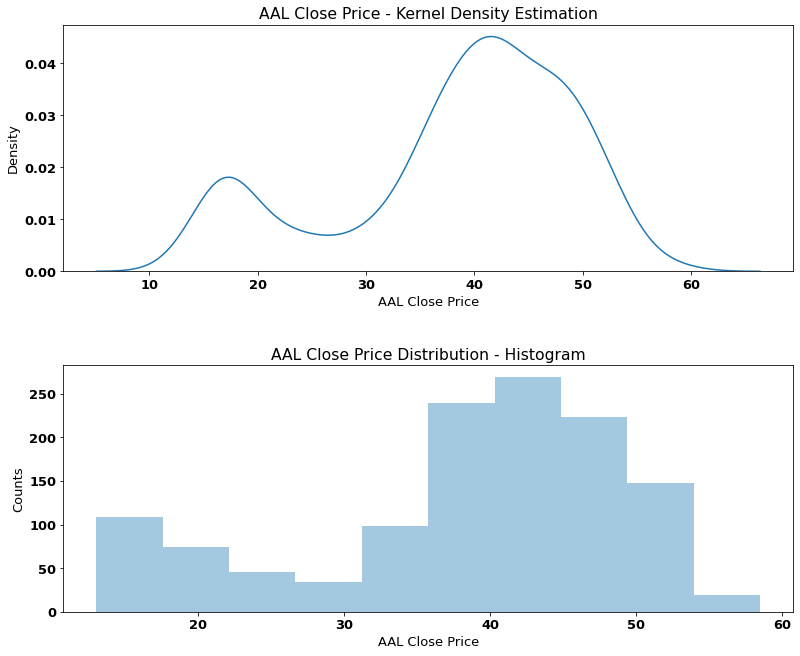

In [11]:
# AAL Close Price  Kernel Density Estimation plot 
fig,axs=plt.subplots(2,1,figsize=(12,10))

sns.distplot(data['close'],kde=True,hist=False,ax=axs[0])
axs[0].set_title('AAL Close Price - Kernel Density Estimation')

# AAL stock market Volume values distribution - Histogram 
sns.distplot(data['close'],kde=False,bins=10,ax=axs[1])
axs[1].set_title('AAL Close Price Distribution - Histogram')
axs[1].set_ylabel('Counts')
for ax in axs.flat:
    plt.rcParams["font.weight"] = "bold"
    plt.rcParams['font.size']=13
    ax.set_xlabel('AAL Close Price')
    ax.figure.tight_layout(pad=3);

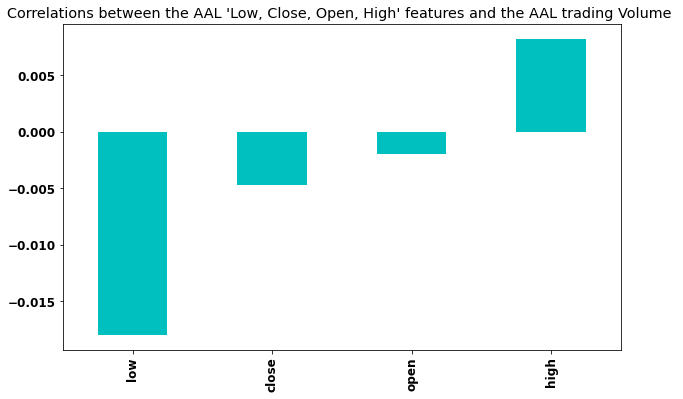

In [12]:
# Bar plot showing the correlations between the 'AAL Volume' feature and the other dataset variables. 
plt.figure(figsize=(10,6))
plt.rcParams['font.size']=12
data.corr(method='pearson')['volume'].sort_values().drop(['Year','Month','volume']).plot(kind='bar',color='c')
plt.title("Correlations between the AAL 'Low, Close, Open, High' features and the AAL trading Volume ");

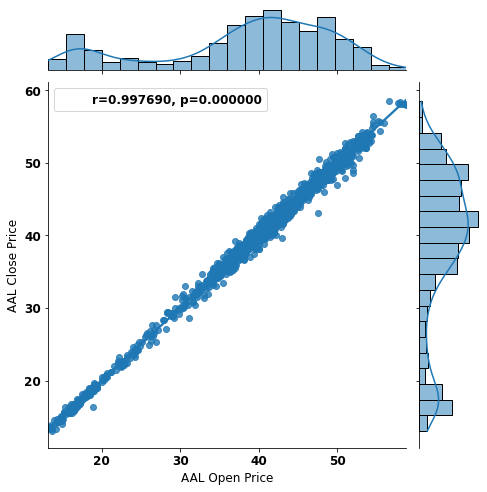

In [13]:
# The 'jointplot' presented in this cell can be used at cases where there is need/requirement to detect/drop outliers.  
# The outliers can have a negative impact on the training process of the deep learning model. In this demonstration, due to
# the strong correlation of these two features (r value very close to 1 and p almost zero --> indicating evidence
# of strong relationship between the two variables),there is no need to drop any values

import scipy.stats as stats
j_plot=sns.jointplot(x=data['open'], y=data['close'],height=7, kind='reg')
r, p = stats.pearsonr(data['open'],data['close'])
rp, = j_plot.ax_joint.plot([], [], linestyle="", alpha=0)
plt.xlabel('AAL Open Price')
plt.ylabel('AAL Close Price')
j_plot.ax_joint.legend([rp],['r={:f}, p={:f}'.format(r,p)])
plt.show()

In [14]:
# In this cell, the goal is to determine the percentage of change of AAL Close Price value on a daily(business day)
# basis. Therefore, AAL Close prices are shifted by 1, then the shifted values are subtracted from each daily value
# and the difference is divided by the previous day value and finally multiplied by 100. 
# The final array is converted into a pd.dataframe and the column is renamed as presented below.
# Negative values indicate a decrease in the AAL Close price with respect to the previous business day
perc_close_change=100*((data['close']-data['close'].shift(1))/data['close'].shift(1))
perc_close_change=perc_close_change.dropna()
perc_close_change=pd.DataFrame(perc_close_change)
perc_close_change.rename(columns={'close':'Close_Businness_Day_Change_%'},inplace=True)
perc_close_change.head()

,Close_Businness_Day_Change_%
1,-1.966102
2,-1.313970
3,2.733006
4,-4.570259
5,3.645461


In [15]:
# Summary Statistics of the AAL Close Price - Business Day Change %
perc_close_change.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Close_Businness_Day_Change_%,1258.0,0.124536,2.245638,-13.071201,-1.128798,0.12553,1.410568,11.232349


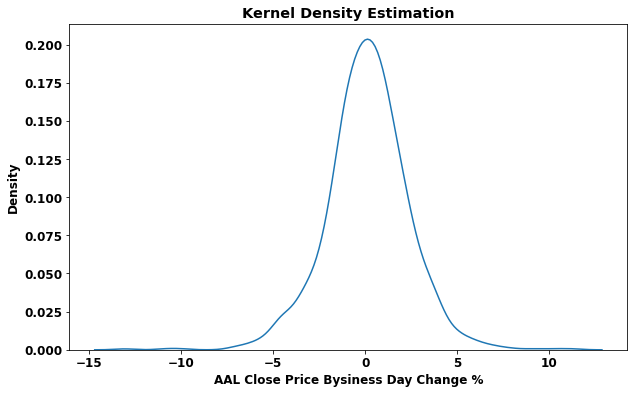

In [16]:
# AAL Close Price - Bysiness Day Change % - Kernel Density Estimation plot
plt.figure(figsize=(10,6))
plt.xlabel('AAL Close Price Bysiness Day Change %',fontweight='bold')
plt.ylabel('Density',fontweight='bold')
plt.title('Kernel Density Estimation',fontweight='bold')
sns.distplot(perc_close_change,kde=True,hist=False);

# Part B - - Case Study 

***Time Series Forecasting (Step-Ahead) of the parameter of interest (dependent variable) based on input (independent variables)***

In [17]:
# Setting the 'date' feature as dataset index
data=data.set_index('date')
data.head()

,open,high,low,close,volume,Name,Week_Day,Month,Year
date,,,,,,,,,
2013-02-08,15.07,15.12,14.63,14.75,8407500,AAL,Friday,2,2013
2013-02-11,14.89,15.01,14.26,14.46,8882000,AAL,Monday,2,2013
2013-02-12,14.45,14.51,14.10,14.27,8126000,AAL,Tuesday,2,2013
2013-02-13,14.30,14.94,14.25,14.66,10259500,AAL,Wednesday,2,2013
2013-02-14,14.94,14.96,13.16,13.99,31879900,AAL,Thursday,2,2013


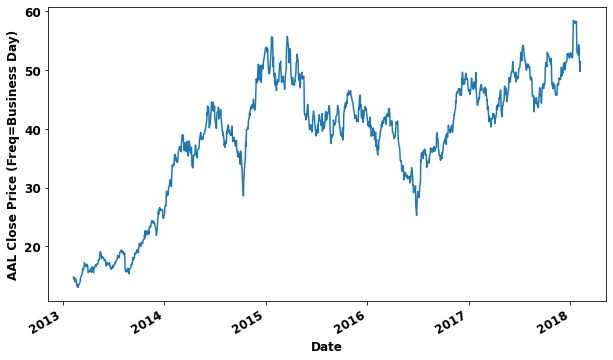

In [18]:
# AAL Close Price past observations (Business Day Freq.)
plt.figure(figsize=(10,6))
data['close'].plot()
plt.xlabel('Date',fontweight='bold')
plt.ylabel('AAL Close Price (Freq=Business Day)',fontweight='bold');

In [19]:
# Dropping the features that are not going to be used as LSTM model inputs
data=data.drop(['Week_Day','Month','Year','Name'],axis=1)

In [20]:
# Changing the frequency of observations from 'Business Day' to 'Weekly' (AAL Close Average Weekly price)
data=data.resample('W').mean()
data.shape

(262, 5)

In [21]:
# The index has been updated (frequency=Week)
data.head()

,open,high,low,close,volume
date,,,,,
2013-02-10,15.0700,15.1200,14.630,14.7500,8407500.0
2013-02-17,14.5020,14.8060,13.940,14.3760,14955080.0
2013-02-24,13.9225,14.0925,13.335,13.6325,11018275.0
2013-03-03,13.3760,13.6760,13.118,13.3460,7503260.0
2013-03-10,14.3440,14.5860,14.154,14.4520,9762620.0


In [22]:
# DatetimeIndex: 262 entries, 2013-02-10 to 2018-02-11
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 262 entries, 2013-02-10 to 2018-02-11
Freq: W-SUN
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   open    262 non-null    float64
 1   high    262 non-null    float64
 2   low     262 non-null    float64
 3   close   262 non-null    float64
 4   volume  262 non-null    float64
dtypes: float64(5)
memory usage: 12.3 KB


In [23]:
# No presence of missing/'NaN' entries
data.isnull().sum()

open      0
high      0
low       0
close     0
volume    0
dtype: int64

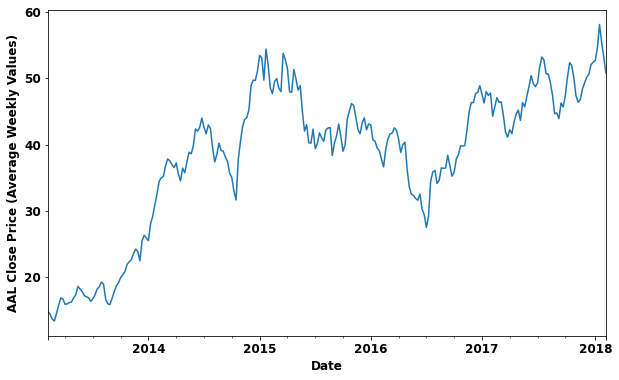

In [24]:
# AAL Close price past observations (Freq=Week.)
plt.figure(figsize=(10,6))
data['close'].plot()
plt.xlabel('Date',fontweight='bold')
plt.ylabel('AAL Close Price (Average Weekly Values)',fontweight='bold');

In [25]:
# Function to create the input-output sequence. Each train batch consists of 12 input sequences & the corresponding 
# y_target value (one step-ahead)
from numpy import array

def set_seq(seq, seq_len):
    X = []
    y = []
    for t in range(len(seq)-seq_len):
        end = t + seq_len # End index is equal to the current index plus the specified number of sequence length
        
# for seq_length=12 : X_input seq. ->12 (indices 0-11) past observations, y_target -> 1 observation at one time step ahead
# (index 12)
        Xseq= seq[t:end, :-1]
        y_target =seq[end, -1]
        X.append(Xseq)
        y.append(y_target)
    return array(X), array(y) #initializing the arrays

In [26]:
# Defining the sequences that comprise the inputs and output of the LSTM model
input_seq1 =data['open'].values
input_seq2 = data['high'].values
input_seq3 = data['low'].values
input_seq4 = data['volume'].values
output_seq = data['close'].values

In [27]:
# Reshaping the input and output sequences so as to convert them into 2d shape
input_seq1 = input_seq1.reshape((len(input_seq1), 1))
input_seq2 = input_seq2.reshape((len(input_seq2), 1))
input_seq3 = input_seq3.reshape((len(input_seq3), 1))
input_seq4 = input_seq4.reshape((len(input_seq4), 1))
output_seq = output_seq.reshape((len(output_seq), 1))

In [28]:
# Use of hstack to put together the input sequence arrays horizontally (column wise)
from numpy import hstack
df = hstack((input_seq1, input_seq2,input_seq3, input_seq4))
df[:5]

array([[1.5070000e+01, 1.5120000e+01, 1.4630000e+01, 8.4075000e+06],
       [1.4502000e+01, 1.4806000e+01, 1.3940000e+01, 1.4955080e+07],
       [1.3922500e+01, 1.4092500e+01, 1.3335000e+01, 1.1018275e+07],
       [1.3376000e+01, 1.3676000e+01, 1.3118000e+01, 7.5032600e+06],
       [1.4344000e+01, 1.4586000e+01, 1.4154000e+01, 9.7626200e+06]])

In [29]:
# Selecting the length of each sequence and the size of the prediction horizon (forecast_steps)
seq_len= 12
pred_horizon=52
# Splitting the dataset into training and test set (y_test -->to compare the LSTM forecasts for given inputs (X_test))
X_train=df[:-pred_horizon]
y_train=output_seq[:-pred_horizon]
X_test=df[-pred_horizon:]
y_test=output_seq[-pred_horizon:]



In [30]:
# The shape of training and test data
print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)


(210, 4) (210, 1)
(52, 4) (52, 1)


In [31]:
# MinMaxScaler is used to transform dataset columns by scaling them between 0 & 1.Training samples are first fitted 
# and then transformed, whereas the test samples are transformed based on the previously fitted training samples in order
# to avoid forecasting with a biased ML model.
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)
y_train=scaler.fit_transform(y_train)
y_test=scaler.transform(y_test)

In [32]:
# Use of hstack to put together the train sequence arrays horizontally 
df_train = hstack((X_train,y_train))
# Creating the training sequences
Xtrain_seq,ytrain_seq=set_seq(df_train, seq_len)

In [33]:
# Presenting the first two training sequences. As it can be observed, the first 12 input entries (seq_len=12),
# i.e. The current index input value at time step 12 and the past 11 observations for each feature, together with the
# AAL Close price at time step 13 (one-step ahead),comprise the first sequence.
# In the second batch, the sequence is updated by dropping the first input values and appending the next X-y values
# at the end of the batch.
# As it can be observed, the first two y target values correspond to the y_train values with indices 12 and 13 for
# time steps 13 and 14 respectively
for t in range(2):
    print(Xtrain_seq[t], ytrain_seq[t])
print('\r')
print('The first two ytrain_seq values correspond to the  train target values (y_train) with indexes 12 and 13 : ')
print(y_train[12:14])


[[0.04187058 0.03523541 0.03798804 0.11663541]
 [0.02783133 0.02757342 0.02065223 0.26990164]
 [0.01350784 0.01016312 0.00545199 0.17774862]
 [0.         0.         0.         0.09546889]
 [0.02392605 0.02220514 0.02602884 0.14835616]
 [0.05477285 0.05597648 0.05708256 0.16979233]
 [0.08324682 0.08223223 0.08562384 0.14654016]
 [0.08382767 0.07927967 0.0849706  0.09047513]
 [0.06292946 0.06183278 0.05999699 0.13166948]
 [0.06243512 0.06071032 0.0653736  0.01657994]
 [0.06965248 0.06871393 0.06728305 0.09155085]
 [0.06737852 0.06866513 0.06828803 0.10927216]] 0.08539643126658392
[[0.02783133 0.02757342 0.02065223 0.26990164]
 [0.01350784 0.01016312 0.00545199 0.17774862]
 [0.         0.         0.         0.09546889]
 [0.02392605 0.02220514 0.02602884 0.14835616]
 [0.05477285 0.05597648 0.05708256 0.16979233]
 [0.08324682 0.08223223 0.08562384 0.14654016]
 [0.08382767 0.07927967 0.0849706  0.09047513]
 [0.06292946 0.06183278 0.05999699 0.13166948]
 [0.06243512 0.06071032 0.0653736  0.01

In [34]:
# The input training data have been converted into 3d shape--> [sample_length,seq_len, number of input features]
print(Xtrain_seq.shape)


(198, 12, 4)


In [35]:
# Defining the number of input features
features_num = Xtrain_seq.shape[2]
features_num

4

In [36]:
# Reshaping the target train data to be inserted into the LSTM model in the proper dimension
ytrain_seq=ytrain_seq.reshape((-1,1))
ytrain_seq.shape

(198, 1)

In [37]:
# Importing the necessary libraries to create/construct the neural network model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,LSTM
from tensorflow.keras import initializers
import tensorflow as tf
tf.random.set_seed(0)
np.random.seed(0)
# Use of the he_uniform initializer to set the initial weights of the model layers. 
initializer = tf.keras.initializers.he_uniform(seed=0)
model = Sequential()
# Use of 12 neurons--> equal to the length of an input train sequence
model.add(LSTM(12, activation='relu',  input_shape=(seq_len, features_num),
               kernel_initializer=initializer))

# The output layer consists of 1 neuron with a 'linear' activation fuction
model.add(Dense(1,activation='linear',kernel_initializer=initializer))
# The model is compiled with selected loss function= 'mse', whereas the selected optimizer is 'adam' with a learning rate
# of 0.001, epsilon=1e-8 and with the default values of the exponential decay rates for the first and second moment estimates
opt = tf.keras.optimizers.Adam(learning_rate=0.001,
    beta_1=0.9,
    beta_2=0.999,
    epsilon=1e-8)

model.compile(optimizer=opt, loss='mse')

# Fitting the LSTM model 
model.fit( Xtrain_seq, ytrain_seq,epochs=60, batch_size=1, shuffle=False)




Epoch 1/60
198/198 [==============================] - 1s 2ms/step - loss: 0.0289
Epoch 2/60
198/198 [==============================] - 0s 2ms/step - loss: 0.0200
Epoch 3/60
198/198 [==============================] - 0s 2ms/step - loss: 0.0053
Epoch 4/60
198/198 [==============================] - 0s 2ms/step - loss: 0.0033
Epoch 5/60
198/198 [==============================] - 0s 2ms/step - loss: 0.0031
Epoch 6/60
198/198 [==============================] - 0s 2ms/step - loss: 0.0030
Epoch 7/60
198/198 [==============================] - 0s 2ms/step - loss: 0.0028
Epoch 8/60
198/198 [==============================] - 0s 2ms/step - loss: 0.0027
Epoch 9/60
198/198 [==============================] - 0s 2ms/step - loss: 0.0027
Epoch 10/60
198/198 [==============================] - 0s 2ms/step - loss: 0.0026
Epoch 11/60
198/198 [==============================] - 0s 2ms/step - loss: 0.0026
Epoch 12/60
198/198 [==============================] - 0s 2ms/step - loss: 0.0026
Epoch 13/60
198/198 [====

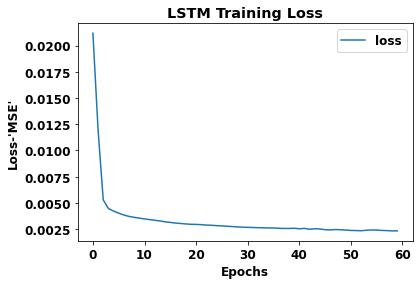

In [38]:
# Training loss plot
loss = pd.DataFrame(model.history.history)
loss.plot()
plt.title('LSTM Training Loss',fontweight='bold')
plt.xlabel('Epochs',fontweight='bold')
plt.ylabel("Loss-'MSE'",fontweight='bold');

***Training Predictions***

In [39]:
# Determining all LSTM fitted training values so as to compare them with the actual AAL Close training values 

train_lstm_outputs = []
train_batch = Xtrain_seq[0].reshape((1, seq_len, features_num))

for i in range(len(Xtrain_seq[1:])):
    train_lstm_out = model.predict(train_batch)[0]
    train_lstm_outputs.append(train_lstm_out)
    train_batch=Xtrain_seq[1:][i].reshape((1, seq_len, features_num))
    
#Append train_lstm_output from last train batch    
train_lstm_outputs.append(model.predict(train_batch)[0]) 

In [40]:
# Last appended input to the final train sequence (train_batch) is X_train[-2]. 
# The X_train[-1] is to be appended to the input sequence after training to determine the first forecasted value 
# This is because the model is trained to predict one step ahead 
print('Final train batch (sequence): \n')
print(train_batch)
print("\r")
print('Last input of the final train batch: \n')
print(X_train[-2])

Final train batch (sequence): 

[[[0.77280142 0.76934714 0.77674489 0.12329947]
  [0.81180483 0.80674207 0.82551128 0.03698872]
  [0.81457314 0.81234215 0.82021004 0.07947315]
  [0.84141579 0.84372266 0.84855032 0.09254625]
  [0.86395768 0.86487805 0.86942867 0.09265683]
  [0.87404222 0.86824543 0.88751822 0.01302764]
  [0.8572841  0.84615009 0.85867544 0.00852379]
  [0.82045578 0.81574003 0.82340712 0.07598067]
  [0.85150032 0.85306785 0.85241948 0.05156683]
  [0.84426937 0.83632859 0.84774634 0.03610242]
  [0.86212863 0.85614241 0.85734385 0.12626209]
  [0.77215878 0.76351524 0.77008542 0.15591175]]]

Last input of the final train batch: 

[0.77215878 0.76351524 0.77008542 0.15591175]


In [41]:
# Applying the inverse_transform function to the training_outputs to get their true values
step_train_predictions=scaler.inverse_transform(train_lstm_outputs)
step_train_predictions=step_train_predictions.reshape((-1,1))

In [42]:
# Length of train sequences
len(Xtrain_seq)

198

In [43]:
# Applying the inverse_transform function to the ytrain_seq set
ytrain_seq=scaler.inverse_transform(ytrain_seq)

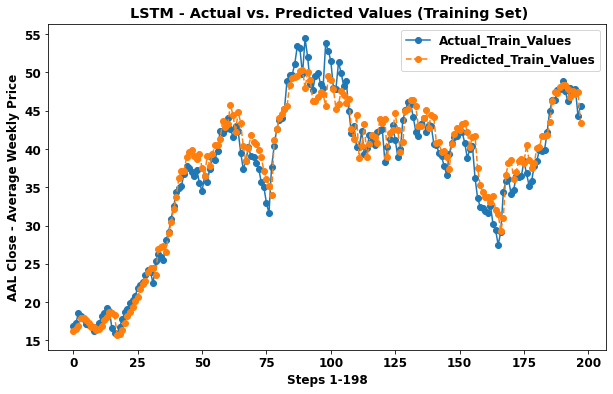

In [44]:
# LSTM Training Performance - Actual vs. Predicted Training Values'for 198 training steps (198 training sequences)

plt.figure(figsize=(10,6))
plt.plot(ytrain_seq,marker='o',linestyle='-')

plt.plot(step_train_predictions,marker='o',linestyle='dashed')
plt.title(' LSTM - Actual vs. Predicted Values (Training Set)',fontweight='bold')
plt.legend(('Actual_Train_Values','Predicted_Train_Values'))
plt.xlabel('Steps 1-198',fontweight='bold')
plt.ylabel('AAL Close - Average Weekly Price',fontweight='bold');

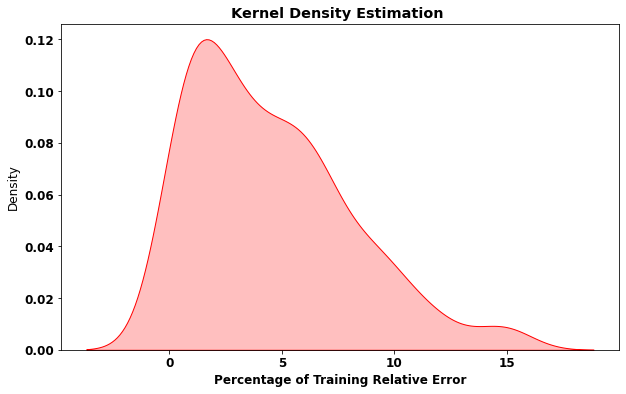

In [45]:
# Training relative Error Percentage distribution plot
step_train_err=abs((ytrain_seq-step_train_predictions)/ytrain_seq)*100
step_train_err=pd.DataFrame(step_train_err,columns=['Training Error'])
plt.figure(figsize=(10,6))
sns.kdeplot(step_train_err['Training Error'],shade=True,color='r',kernel='gau',)
plt.xlabel('Percentage of Training Relative Error',fontweight='bold')
plt.title('Kernel Density Estimation ',fontweight='bold');

In [46]:
# Summary statistics of training relative error

step_train_err.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Training Error,198.0,4.522518,3.552291,0.006326,1.57002,3.649725,6.609972,15.164423


In [47]:
# Determining the Root Mean Squared Error of the train_predicted values and the actual_train values
RMSE=np.sqrt(mean_squared_error(ytrain_seq,step_train_predictions))
RMSE=RMSE.round(2)
RMSE

2.13

***Time Series Forecasting & comparison with Test Set*** 

In [48]:
# Creating the first batch to forecast the first AAL Close price.
# First batch consists of the final train batch, where the last X train input (X_train[-1]) is appended 
first_batch=np.append(train_batch[:,1:,:],[[X_train[-1].reshape((1,1,features_num))]])
first_batch=first_batch.reshape((1, seq_len, features_num))
print(first_batch)
X_train[-1]

[[[0.81180483 0.80674207 0.82551128 0.03698872]
  [0.81457314 0.81234215 0.82021004 0.07947315]
  [0.84141579 0.84372266 0.84855032 0.09254625]
  [0.86395768 0.86487805 0.86942867 0.09265683]
  [0.87404222 0.86824543 0.88751822 0.01302764]
  [0.8572841  0.84615009 0.85867544 0.00852379]
  [0.82045578 0.81574003 0.82340712 0.07598067]
  [0.85150032 0.85306785 0.85241948 0.05156683]
  [0.84426937 0.83632859 0.84774634 0.03610242]
  [0.86212863 0.85614241 0.85734385 0.12626209]
  [0.77215878 0.76351524 0.77008542 0.15591175]
  [0.7940086  0.79015653 0.80287423 0.05127724]]]


array([0.7940086 , 0.79015653, 0.80287423, 0.05127724])

In [49]:
# Determining all LSTM predicted values so as to compare them with the actual test values 
lstm_outputs = []
# Current batch is the last sequence of Xtrain
batch =first_batch

# loop to determine all other predictions based on the X_test inputs that are appended to the batch
for i in range(len(X_test)):
    
    lstm_out = model.predict(batch)[0]
    lstm_outputs.append(lstm_out) 
# The first row of the current batch sequence is dropped, and the next X_test input is placed at the end of the batch
    batch = np.append(batch[:,1:,:],[[X_test[i]]],axis=1)

    



In [50]:
# Applying the inverse_transform function to the predicted values to get their true values
step_true_predictions=scaler.inverse_transform(lstm_outputs)
step_true_predictions

array([[45.65446361],
       [46.43769444],
       [46.10978653],
       [45.94844757],
       [43.5629458 ],
       [40.94341158],
       [41.45741278],
       [42.68111147],
       [41.95077802],
       [44.00313699],
       [45.48744659],
       [45.01775098],
       [43.43756795],
       [46.20686217],
       [45.47491762],
       [46.88695976],
       [48.20931828],
       [48.97564221],
       [48.02912832],
       [47.96397621],
       [48.08592616],
       [48.85237007],
       [49.85355405],
       [49.58775477],
       [47.93459422],
       [48.03639547],
       [46.99182653],
       [46.0774394 ],
       [43.21634605],
       [44.6712761 ],
       [43.449475  ],
       [45.11501272],
       [44.81400892],
       [45.75958258],
       [47.16238409],
       [48.77638824],
       [48.29140421],
       [47.59078086],
       [46.23784303],
       [46.27078759],
       [46.12928882],
       [47.29454183],
       [47.80937062],
       [48.13999882],
       [48.22450876],
       [48

In [51]:
# Applying the inverse_transform function to the y_test set
y_test=scaler.inverse_transform(y_test)

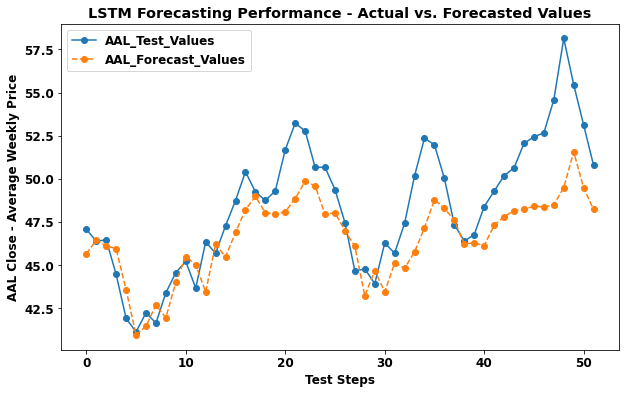

In [52]:
# Plot of the Test vs. Predicted results for a prediction horizon of 52 weeks
plt.figure(figsize=(10,6))
plt.plot(y_test,marker='o',linestyle='-')
plt.plot(step_true_predictions,marker='o',linestyle='dashed')
plt.title('LSTM Forecasting Performance - Actual vs. Forecasted Values',fontweight='bold')
plt.legend(('AAL_Test_Values','AAL_Forecast_Values'))
plt.xlabel('Test Steps',fontweight='bold')
plt.ylabel('AAL Close - Average Weekly Price',fontweight='bold');

In [53]:
# Date index of first y_train value
data.index[seq_len]

Timestamp('2013-05-05 00:00:00', freq='W-SUN')

In [54]:
# LSTM training outputs indices
step_train_index=pd.date_range(start='2013-05-05',periods=198,freq='W')

In [55]:
# Converting the train_predictions from np.ndarray to pandas dataframe
step_train_data=pd.DataFrame(data=step_train_predictions,index=step_train_index,columns=['Predicted (Train_Set)'])

In [56]:
# Date index of first forecasted value
data.index[-pred_horizon]

Timestamp('2017-02-19 00:00:00', freq='W-SUN')

In [57]:
# LSTM forecasted outputs indices
step_pred_index=pd.date_range(start='2017-02-19',periods=pred_horizon,freq='W')

In [58]:
# Converting the step_true_predictions from np.ndarray to pandas dataframe
step_pred_data=pd.DataFrame(data=step_true_predictions,index=step_pred_index,columns=['Forecast'])

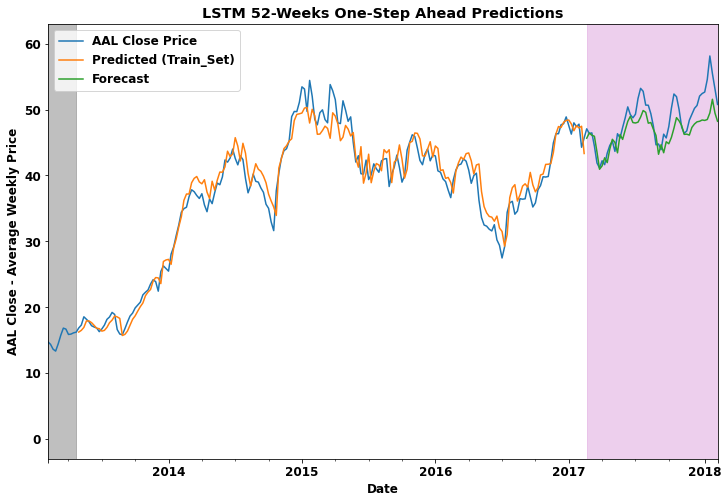

In [63]:
# Final plot comprising all the actual AAL Close values, the LSTM model's predictions on the training set (index 12 to 209) & 
# the LSTM forecasts from index 210 (time step 211)  to 261 (time step 262)

ax=data['close'].plot(figsize=(12,8),label='AAL Close Price')
ax.fill_between(data.index,0,60 ,where=data.index < step_train_index[0],
                color='grey', alpha=0.5, transform=ax.get_xaxis_transform())
ax.fill_between(data.index,0,60 ,where=data.index > step_train_index[-1],
                color='plum', alpha=0.5, transform=ax.get_xaxis_transform())
step_train_data.plot(ax=ax)
step_pred_data.plot(ax=ax)
plt.legend()
plt.xlabel('Date',fontweight='bold')
plt.ylabel('AAL Close - Average Weekly Price',fontweight='bold')
plt.title('LSTM 52-Weeks One-Step Ahead Predictions',fontweight='bold')
plt.show()


In [60]:
# RMSE of forecasted and test AAL Close prices
RMSE=np.sqrt(mean_squared_error(y_test,step_true_predictions))
RMSE=RMSE.round(2)
RMSE

2.72